In [71]:
import pandas as pd
from gensim import corpora, models, similarities
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
import cPickle as pickle
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
f = '../data/sherlock_current_wtext.csv'

In [3]:
df = pd.read_csv(f)

In [188]:
def create_sentences_list(text):
    text = text.split('.')
    sentences = []
#     stops = set(stopwords.words("english"))
    for i in text:
        sentence_f = []
        sentence = i.split(' ')
        for j in sentence:
            if len(j) > 1 and j[0] == 'A':
                j = j.replace('A', '').strip()
            sentence_f.append(j)
        sentence_f = [i.lower().replace(',', '') for i in sentence_f]
        sentence_f = [i.replace('"', '') for i in sentence_f]

        
#         sentence = [i for i in sentence if i not in stops]
        sentences.append(sentence_f)
    return sentences

In [5]:
def create_word2vec_model(sentences,window = 10, min_count=5):
    model = models.Word2Vec(sentences, window = window, min_count=min_count)
    return model

In [6]:
def create_corpus(sentences):
    id2word = corpora.dictionary.Dictionary(sentences)
    corpus = [id2word.doc2bow(sentence) for sentence in sentences]
    return id2word, corpus

In [7]:
def create_df_time(df, time):
    return df[df.PublishDate.str[:7] == time]

In [148]:
df_t = df[df.Words.notnull()].drop_duplicates(['Title', 'Words', 'Author'])

In [149]:
len(df_t)

69623

In [142]:
sum(df_t.Words)

320603694.0

In [154]:
words = []
for time in timelist:
    df_time = create_df_time(df_t, time)
    words.append(sum(df_time.Words))

In [13]:
timelist = df.PublishDate.drop_duplicates().tolist()
timelist = [str(i)[:7] for i in timelist]
timelist = list(set(timelist))
timelist = sorted(timelist)
timelist = timelist[3:]

In [17]:
# doc_word = []

In [189]:
# doc_word2 = []

In [205]:
for time in timelist[40:45]:
    df_time = create_df_time(df, time)
    t = ''.join([i for i in df_time.Text.astype(str)])
    sentences = create_sentences_list(t)
    word2vec = create_word2vec_model(sentences, window = 10, min_count = 5)
    top_words = word2vec.most_similar('john', topn = 50)
    doc = ''
    for i in top_words:
        doc += i[0]
        doc += ' '
    doc_word2.append(doc)

In [206]:
for time in timelist[45:50]:
    df_time = create_df_time(df, time)
    t = ''.join([i for i in df_time.Text.astype(str)])
    sentences = create_sentences_list(t)
    word2vec = create_word2vec_model(sentences, window = 10, min_count = 5)
    top_words = word2vec.most_similar('john', topn = 50)
    doc = ''
    for i in top_words:
        doc += i[0]
        doc += ' '
    doc_word2.append(doc)

In [207]:
for time in timelist[50:65]:
    df_time = create_df_time(df, time)
    t = ''.join([i for i in df_time.Text.astype(str)])
    sentences = create_sentences_list(t)
    word2vec = create_word2vec_model(sentences, window = 10, min_count = 5)
    top_words = word2vec.most_similar('john', topn = 50)
    doc = ''
    for i in top_words:
        doc += i[0]
        doc += ' '
    doc_word2.append(doc)

In [210]:
len(doc_word2)

65

In [323]:
doc_word3 = [''.join([j+' ' for j in i.split(' ')[0:20]]) for i in doc_word2]

In [209]:
pickle.dump(doc_word2, open( "word2vec_topwords_2.p", "wb" ) )

In [59]:
# pickle.dump(doc_word, open( "word2vec_topwords.p", "wb" ) )

In [167]:
# doc_word = pickle.load( open( "word2vec_topwords.p", "rb" ) )

In [211]:
vectorizer = CountVectorizer(min_df=1)

In [325]:
m = vectorizer.fit_transform(doc_word3)

In [213]:
from scipy import stats

In [335]:
scores_pearson = []
for i in range(len(doc_word3)-1):
    v1 = m[i].toarray()[0]
    v2 = m[i+1].toarray()[0]
    scores_pearson.append(stats.pearsonr(v1, v2)[0])

In [225]:
scores_sherlock_norm_mi = []
for i in range(len(doc_word)-1):
    v1 = m[i].toarray()[0]
    v2 = m[i+1].toarray()[0]
    scores_sherlock_norm_mi.append(metrics.normalized_mutual_info_score(v1, v2))

In [336]:
scores_adj_mi = []
for i in range(len(doc_word3)-1):
    v1 = m[i].toarray()[0]
    v2 = m[i+1].toarray()[0]
    scores_adj_mi.append(metrics.adjusted_mutual_info_score(v1, v2))

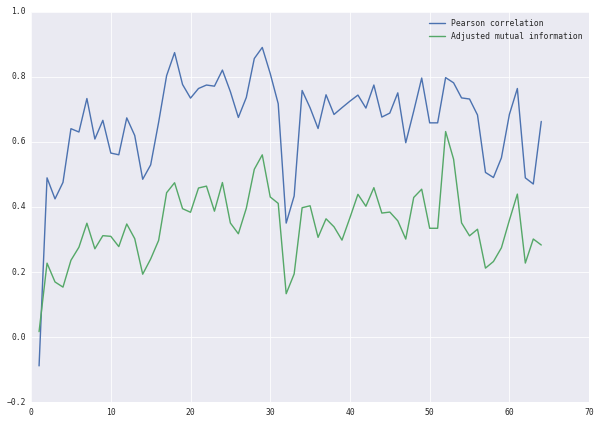

In [328]:
xlist = range(1, len(timelist))
plt.figure(figsize = (10,7))
plt.plot(xlist, scores_sherlock_pearson, label='Pearson correlation')
plt.plot(xlist,scores_sherlock_adj_mi, label = 'Adjusted mutual information' )
plt.legend()
# plt.xticks(xlist, timelist, rotation=70, fontsize = 13)
# plt.xlim(xmax=65)
# plt.tight_layout()
# plt.ylabel('Fleiss\' Kappa')
# plt.savefig('mi_pearson_watson.pdf', format = 'pdf')

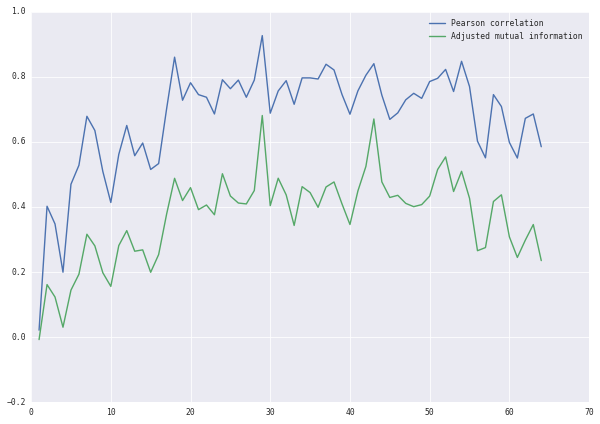

In [338]:
xlist = range(1, len(timelist))
plt.figure(figsize = (10,7))
plt.plot(xlist, scores_pearson, label='Pearson correlation')
plt.plot(xlist,scores_adj_mi, label = 'Adjusted mutual information' )
plt.legend()
# plt.xticks(xlist, timelist, rotation=70, fontsize = 13)
# plt.xlim(xmax=65)
# plt.tight_layout()
# plt.ylabel('Fleiss\' Kappa')
plt.savefig('mi_pearson_watson.pdf', format = 'pdf')

In [287]:
import seaborn as sns

In [295]:
scores_adj_mi2 = scores_adj_mi

In [301]:
m

<65x893 sparse matrix of type '<type 'numpy.int64'>'
	with 2515 stored elements in Compressed Sparse Row format>

In [308]:
df_mi_p = pd.DataFrame(scores_adj_mi, scores_pearson).reset_index()

In [309]:
df_mi_p.head()

,index,0
0,0.087346,0.012561
1,0.363960,0.142308
2,0.387042,0.155362
3,0.170475,0.046469
4,0.261213,0.069481


In [311]:
corrmat = df_mi_p.corr()
corrmat

,index,0
index,1.000000,0.921882
0,0.921882,1.000000


In [114]:
import numpy as np

In [115]:
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = metrics.mutual_info_score(None, None, contingency=c_xy)
    return mi

In [330]:
scores_1step = []
for i in range(len(doc_word3)-1):
    v1 = m[i].toarray()[0]
    v2 = m[i+1].toarray()[0]
    scores_1step.append(metrics.adjusted_mutual_info_score(v1, v2))
    
scores_2step = []
for i in range(len(doc_word3)-2):
    v1 = m[i].toarray()[0]
    v2 = m[i+2].toarray()[0]
    scores_2step.append(metrics.adjusted_mutual_info_score(v1, v2))
scores_2step.append(None)
    
scores_3step = []
for i in range(len(doc_word3)-3):
    v1 = m[i].toarray()[0]
    v2 = m[i+3].toarray()[0]
    scores_3step.append(metrics.adjusted_mutual_info_score(v1, v2))
scores_3step.append(None)
scores_3step.append(None)
    

scores_4step = []
for i in range(len(doc_word3)-4):
    v1 = m[i].toarray()[0]
    v2 = m[i+4].toarray()[0]
    scores_4step.append(metrics.adjusted_mutual_info_score(v1, v2))
scores_4step.append(None)
scores_4step.append(None)
scores_4step.append(None)


In [331]:
print len(scores_1step), len(scores_2step), len(scores_3step), len(scores_4step)

64 64 64 64


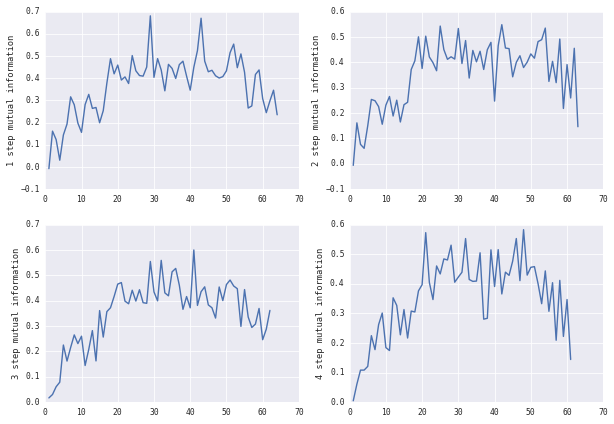

In [334]:
plt.figure(figsize = (10,7))

plt.subplot(221)
plt.plot(xlist, scores_1step)
plt.ylabel('1 step mutual information')

plt.subplot(222)
plt.plot(xlist, scores_2step)
plt.ylabel('2 step mutual information')

plt.subplot(223)
plt.plot(xlist, scores_3step)
plt.ylabel('3 step mutual information')

plt.subplot(224)
plt.plot(xlist, scores_4step)
plt.ylabel('4 step mutual information')

plt.savefig('muti_step_mi_john.pdf', format = 'pdf')

In [58]:
documents = models.doc2vec.TaggedLineDocument('./small.txt')

In [59]:
model2 = models.Doc2Vec(documents, window = 20, min_count = 2)

In [ ]:
# model2.most_similar('Sherlock', topn = 50)

In [62]:
id2word,corpus = create_corpus(sentences)
lda = models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=10)

In [63]:
lda.show_topics(10)

[u'0.090* + 0.048*to + 0.034*you + 0.029*I + 0.019*he + 0.018*that + 0.018*it + 0.015*be + 0.015*have + 0.013*not',
 u"0.036*had + 0.033*been + 0.019*her + 0.017* + 0.015*she + 0.014*and + 0.011*he's + 0.011*says + 0.011*the + 0.010*in",
 u"0.306* + 0.034*is + 0.013*John + 0.011*asked + 0.009*His + 0.009*looks + 0.008*Sherlock's + 0.006*Watson + 0.006*The + 0.006*feels",
 u'0.086*the + 0.044* + 0.041*of + 0.034*and + 0.030*to + 0.028*a + 0.027*was + 0.024*he + 0.022*in + 0.014*that',
 u'0.034*Sherlock + 0.028*said + 0.018*John + 0.018*are + 0.015*is + 0.009*Holmes + 0.008*at + 0.007*What + 0.007*an + 0.007*us',
 u"0.027* + 0.016*Mrs + 0.014*makes + 0.012*Hudson + 0.012*\u2013 + 0.009*soon + 0.008*Mycroft's + 0.007*happened + 0.006*stand + 0.006*crime",
 u'0.085*his + 0.053*and + 0.041*the + 0.030* + 0.021*to + 0.020*John + 0.019*Sherlock + 0.018*He + 0.016*he + 0.015*at',
 u'0.057*\xa0 + 0.018*he\u2019s + 0.015*This + 0.011*Molly + 0.009*shook + 0.008*fine + 0.008*Just + 0.007*Sally + 

In [29]:
lsi = models.lsimodel.LsiModel(corpus=corpus, id2word=id2word, num_topics=40)

In [30]:
lsi.show_topics(10)

[u'0.504*"the" + 0.364*"and" + 0.331*"" + 0.297*"his" + 0.293*"to" + 0.221*"of" + 0.203*"he" + 0.193*"a" + 0.161*"was" + 0.137*"Sherlock"',
 u'-0.787*"the" + 0.284*"to" + 0.244*"his" + 0.184*"he" + 0.164*"a" + 0.157*"and" + 0.148*"" + 0.141*"was" + -0.140*"of" + 0.121*"Sherlock"',
 u'0.767*"his" + -0.302*"to" + 0.238*"and" + -0.203*"" + -0.181*"a" + -0.164*"was" + -0.154*"that" + -0.110*"he" + -0.109*"had" + -0.088*"for"',
 u'-0.723*"to" + 0.431*"a" + 0.254*"and" + 0.226*"he" + 0.183*"was" + -0.167*"his" + 0.150*"that" + 0.123*"of" + -0.100*"the" + 0.091*"in"',
 u'-0.538*"and" + 0.439*"" + 0.391*"a" + -0.344*"he" + 0.226*"his" + 0.223*"of" + -0.123*"was" + -0.122*"to" + 0.116*"on" + 0.106*"in"',
 u'0.535*"and" + -0.503*"he" + 0.322*"a" + -0.313*"was" + -0.238*"his" + 0.167*"to" + 0.136*"you" + -0.135*"that" + 0.112*"her" + -0.105*"had"',
 u'0.660*"" + -0.437*"a" + -0.303*"to" + 0.230*"and" + -0.225*"of" + -0.178*"he" + 0.178*"Sherlock" + -0.143*"his" + 0.112*"Moriarty" + -0.092*"as"',
